In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import json # library to handle JSON files

import requests # library to handle requests

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.cm as cm
import matplotlib.colors as colors # Matplotlib and associated plotting modules

from sklearn.cluster import KMeans # import k-means from clustering stage

!conda install -c conda-forge beautifulsoup4 --yes
from bs4 import BeautifulSoup # website scraping libraries and packages in Python from BeautifulSoup 

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim  # convert an address into latitude and longitude values

print("Libraries imported.")

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.21.0-py_0 conda-forge


geographiclib-1.50   | 34 KB     | ##################################### | 100% 
geopy-1.21.0         | 58 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executi

In [32]:



!conda install -c conda-forge folium=0.5.0 --yes
import folium



Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.0               |             py_0          26 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                       

In [7]:
import lxml.html as lh
import urllib.request
import requests
from bs4 import BeautifulSoup
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import json # library to handle JSON files

import requests # library to handle requests

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.cm as cm
import matplotlib.colors as colors # Matplotlib and associated plotting modules

from sklearn.cluster import KMeans # import k-means from clustering stage

import bs4 as bs

In [8]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
wiki_html = requests.get(url).text
soup = BeautifulSoup(wiki_html, 'html.parser')

data = []
for tr in soup.tbody.find_all('tr'):
    data.append([ td.get_text().strip() for td in tr.find_all('td')])

In [9]:
df=pd.DataFrame(data,columns=['PostalCode','Borough','Neighborhood2'])

In [10]:
# Find indexes of rows that have "Not assigned" in Borough column
indexNames = df[(df['Borough'] == "Not assigned")].index

# Drop rows that have "Not assigned" in Borough column
df.drop(indexNames,inplace=True)

# Drop the first row
df.dropna(inplace=True)

In [11]:
# Combine multiple rows into one row based on PostalCode and Borough
df=df.groupby(['PostalCode','Borough'])['Neighborhood2'].apply(', '.join).reset_index()

In [12]:
# Replace "Not assigned" in Neighborhood column with the value in Borough column
def custom_fx(data):
    if data['Neighborhood2']=='Not assigned':
        var=data['Borough']
    else:
        var=data['Neighborhood2']
    return var

# Apply the function
df['Neighborhood']=df.apply(custom_fx,axis='columns')

# Check that there is no more "Not assigned" in Neighborhood column
print("There are {} rows that have 'Not assigned' in Neighborhood column in the dataframe".format(
    len(df[df['Neighborhood']=='Not assigned'])
)
     )

# Delete Neighborhood2 column
df.drop(columns='Neighborhood2')

There are 0 rows that have 'Not assigned' in Neighborhood column in the dataframe


,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West
9,M1N,Scarborough,Birch Cliff / Cliffside West


In [13]:
# Shape of the table
print("The shape of the dataframe is {}. The dataset has {} rows.".format
      (df.shape,df.shape[0]))

The shape of the dataframe is (103, 4). The dataset has 103 rows.


# Q-2


In [16]:
lonlat=pd.read_csv('http://cocl.us/Geospatial_data')

In [18]:
# Column names of lonlat
print("Column names of lonlat dataframe are: {}, {}, and {}.".format(lonlat.columns[0],lonlat.columns[1],lonlat.columns[2]))


# Change the name "Postal Code" in lonlat to "PostalCode"
lonlat.rename(columns={'PostalCode':'PostalCode'},inplace=True)



Column names of lonlat dataframe are: PostalCode, Latitude, and Longitude.


In [19]:
# Left join
df=pd.merge(df,lonlat,how='left',on='PostalCode')

In [21]:
df.head()

,PostalCode,Borough,Neighborhood2,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,Malvern / Rouge,Malvern / Rouge,43.806686,-79.194353
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497
2,M1E,Scarborough,Guildwood / Morningside / West Hill,Guildwood / Morningside / West Hill,43.763573,-79.188711
3,M1G,Scarborough,Woburn,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,Cedarbrae,43.773136,-79.239476


In [22]:
print("The shape of the dataframe is {}. The dataset has {} rows.".format
      (df.shape,df.shape[0]))

The shape of the dataframe is (103, 6). The dataset has 103 rows.


# Q-3

In [23]:
neighborhoods=df

In [25]:
# Restrict to boroughs that contain the word Toronto 
toronto_data=neighborhoods[neighborhoods.Borough.str.contains('Toronto')]
# The first five rows of the data frame
toronto_data.head()

,PostalCode,Borough,Neighborhood2,Neighborhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,The Danforth West / Riverdale,The Danforth West / Riverdale,43.679557,-79.352188
42,M4L,East Toronto,India Bazaar / The Beaches West,India Bazaar / The Beaches West,43.668999,-79.315572
43,M4M,East Toronto,Studio District,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,Lawrence Park,43.728020,-79.388790


In [27]:
from geopy.geocoders import Nominatim
address = 'Toronto'

geolocator = Nominatim(user_agent="trt_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [33]:

# create map of Manhattan using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [80]:
#Getting the data from url
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
res = requests.get(url)
soup = bs.BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0]
df = pd.read_html(str(table))
data = pd.read_json(df[0].to_json(orient='records'))

In [81]:
data.head()

,Borough,Neighborhood,Postal code
0,Not assigned,None,M1A
1,Not assigned,None,M2A
2,North York,Parkwoods,M3A
3,North York,Victoria Village,M4A
4,Downtown Toronto,Regent Park / Harbourfront,M5A


In [82]:
#Choosing only data where field Borough doesn't have not assigned value
raw_data_selected = data[data['Borough'] != 'Not assigned']

In [84]:
#Grouping Data
raw_data_selected = raw_data_selected.groupby(['Borough', 'Postal code'], as_index=False).agg(','.join)

In [85]:
raw_data_selected.head()

,Borough,Postal code,Neighborhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,North Toronto West
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,Moore Park / Summerhill East


In [88]:
#Replacing values in Neighbourhood field with Borough where Neighbourhood is not assigned
raw_data_selected['Neighborhood'] = np.where(raw_data_selected['Neighborhood'] == 'Not assigned', raw_data_selected['Borough'], raw_data_selected['Neighborhood'])

In [90]:
raw_data_selected.head(11)

,Borough,Postal code,Neighborhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,North Toronto West
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,Moore Park / Summerhill East
5,Central Toronto,M4V,Summerhill West / Rathnelly / South Hill / For...
6,Central Toronto,M5N,Roselawn
7,Central Toronto,M5P,Forest Hill North & West
8,Central Toronto,M5R,The Annex / North Midtown / Yorkville
9,Downtown Toronto,M4W,Rosedale


In [97]:
raw_data_selected.columns = ['Borough', 'Postcode', 'Neighborhood']

In [91]:
#Shape of Data
raw_data_selected.shape

(103, 3)

# Q-2 Longititude and Latitude

In [92]:
geospatial_url = "https://cocl.us/Geospatial_data"
geospatial_data = pd.read_csv(geospatial_url)

In [93]:
geospatial_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [95]:
# Renaming the columns
geospatial_data.columns = ['Postcode', 'Latitude', 'Longitude']

In [98]:
#Merging dataframes
merged_data = pd.merge(raw_data_selected, geospatial_data, on='Postcode')

In [99]:


merged_data.head()



,Borough,Postcode,Neighborhood,Latitude,Longitude
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678
3,Central Toronto,M4S,Davisville,43.704324,-79.388790
4,Central Toronto,M4T,Moore Park / Summerhill East,43.689574,-79.383160


# Q-3

In [100]:
merged_data['Coordinates'] = list(zip(merged_data['Latitude'], merged_data['Longitude']))

In [101]:
merged_data.head()



,Borough,Postcode,Neighborhood,Latitude,Longitude,Coordinates
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,"(43.7280205, -79.3887901)"
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,"(43.7127511, -79.3901975)"
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678,"(43.7153834, -79.40567840000001)"
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,"(43.7043244, -79.3887901)"
4,Central Toronto,M4T,Moore Park / Summerhill East,43.689574,-79.383160,"(43.6895743, -79.38315990000001)"


In [118]:
!conda install -c conda-forge shapely 


Solving environment: done

# All requested packages already installed.



In [120]:
!conda install -c conda-forge geopandas 

Solving environment: done

# All requested packages already installed.



In [135]:
import geopandas as gpd
from shapely.geometry import Point

In [136]:
merged_data['Coordinates'] = list(zip(merged_data['Latitude'], merged_data['Longitude']))

In [137]:


merged_data.head()



,Borough,Postcode,Neighborhood,Latitude,Longitude,Coordinates
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,"(43.7280205, -79.3887901)"
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,"(43.7127511, -79.3901975)"
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678,"(43.7153834, -79.40567840000001)"
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,"(43.7043244, -79.3887901)"
4,Central Toronto,M4T,Moore Park / Summerhill East,43.689574,-79.383160,"(43.6895743, -79.38315990000001)"


In [138]:
merged_data['Coordinates'] = merged_data['Coordinates'].apply(Point)

In [139]:
gdf = gpd.GeoDataFrame(merged_data, geometry='Coordinates')

In [140]:
gdf.head()

,Borough,Postcode,Neighborhood,Latitude,Longitude,Coordinates
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,POINT (43.72802 -79.38879)
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,POINT (43.71275 -79.39020)
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678,POINT (43.71538 -79.40568)
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,POINT (43.70432 -79.38879)
4,Central Toronto,M4T,Moore Park / Summerhill East,43.689574,-79.383160,POINT (43.68957 -79.38316)


/opt/conda/envs/Python36/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


NameError: name 'plt' is not defined

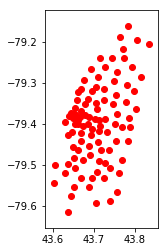

In [141]:
# set up map
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='green', edgecolor='black')
# plot and show
gdf.plot(ax=ax, color='red')

plt.show()